In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/results.csv', encoding='latin1')
df.head()



,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
## Filtering only Manchester city matches

In [14]:
mc = df[(df['HomeTeam'] == 'Man City') | (df['AwayTeam'] == 'Man City')]

print(f"Total Man city matches are: {len(mc)}")

mc.head()


Total Man city matches are: 913


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1993-94,1993-08-17T00:00:00Z,Everton,Man City,1,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1993-94,1993-08-21T00:00:00Z,Tottenham,Man City,1,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,1993-94,1993-08-24T00:00:00Z,Man City,Blackburn,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,1993-94,1993-08-27T00:00:00Z,Man City,Coventry,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
## Goals scored and conceded per match

In [20]:
def goals_scored(row):
    if row['HomeTeam'] == 'Man City':
        return row['FTHG']
    else:
        return row['FTAG']

def goals_conceded(row):
    if row['HomeTeam'] == 'Man City':
        return row['FTAG']
    else:
        return row['FTHG']

mc.loc[:, 'GoalsScored'] = mc.apply(goals_scored, axis=1)
mc.loc[:, 'GoalsConceded'] = mc.apply(goals_conceded, axis=1)

mc[['DateTime', 'HomeTeam', 'AwayTeam', 'GoalsScored', 'GoalsConceded']].head()

,DateTime,HomeTeam,AwayTeam,GoalsScored,GoalsConceded
4,1993-08-14T00:00:00Z,Man City,Leeds,1,1
12,1993-08-17T00:00:00Z,Everton,Man City,0,1
30,1993-08-21T00:00:00Z,Tottenham,Man City,0,1
35,1993-08-24T00:00:00Z,Man City,Blackburn,0,2
44,1993-08-27T00:00:00Z,Man City,Coventry,1,1


In [24]:
## Average goals scored

In [25]:
print("Average Goals Scored:", mc['GoalsScored'].mean())
print("Average Goals Conceded:", mc['GoalsConceded'].mean())

Average Goals Scored: 1.7250821467688937
Average Goals Conceded: 1.1073384446878423


In [31]:
## Goals scored  and conceded per season

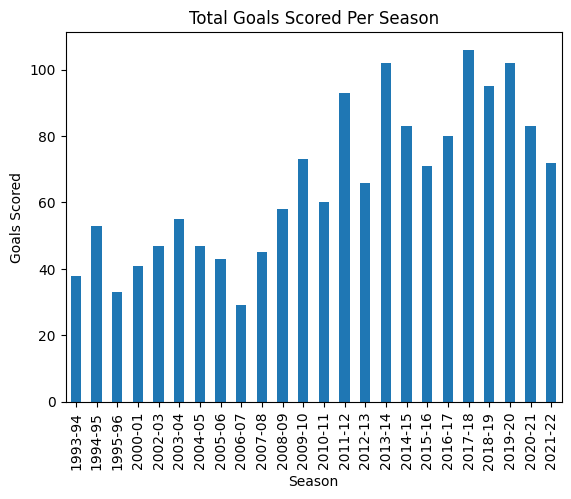

In [29]:
goals_per_season = mc.groupby('Season')['GoalsScored'].sum()

import matplotlib.pyplot as plt

goals_per_season.plot(kind='bar', title='Total Goals Scored Per Season')
plt.ylabel('Goals Scored')
plt.show()

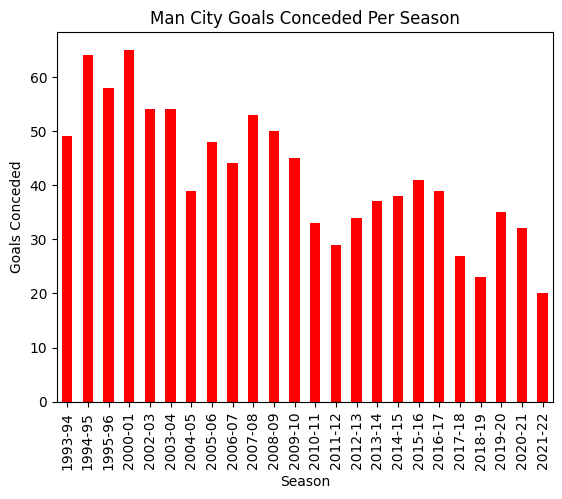

In [32]:
conceded_per_season = mc.groupby('Season')['GoalsConceded'].sum()
conceded_per_season.plot(kind='bar', color='red', title='Man City Goals Conceded Per Season')
plt.ylabel('Goals Conceded')
plt.show()

In [33]:
## Goal difference per season

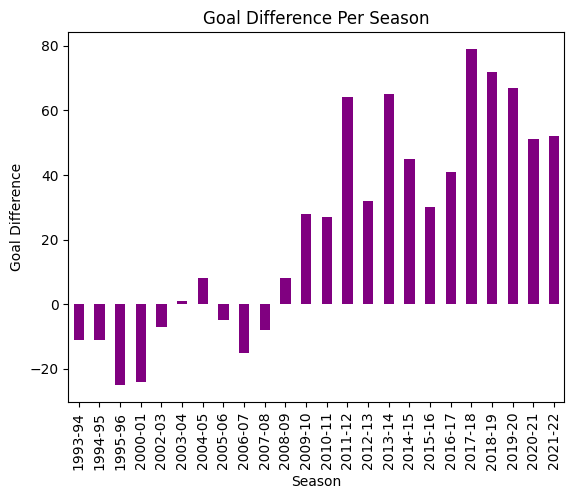

In [34]:
season_summary = mc.groupby('Season')[['GoalsScored', 'GoalsConceded']].sum()
season_summary['GoalDifference'] = season_summary['GoalsScored'] - season_summary['GoalsConceded']

season_summary['GoalDifference'].plot(kind='bar', color='purple', title='Goal Difference Per Season')
plt.ylabel('Goal Difference')
plt.show()


In [35]:
## Wins lose percentage per season

In [40]:
def match_result(row):
    if row['HomeTeam'] == 'Man City':
        if row['FTR'] == 'H':
            return 'Win'
        elif row['FTR'] == 'D':
            return 'Draw'
        else:
            return 'Loss'
    else:  # Man City is Away
        if row['FTR'] == 'A':
            return 'Win'
        elif row['FTR'] == 'D':
            return 'Draw'
        else:
            return 'Loss'

mc['Result'] = mc.apply(match_result, axis=1)


/tmp/ipython-input-40-4210626003.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc['Result'] = mc.apply(match_result, axis=1)


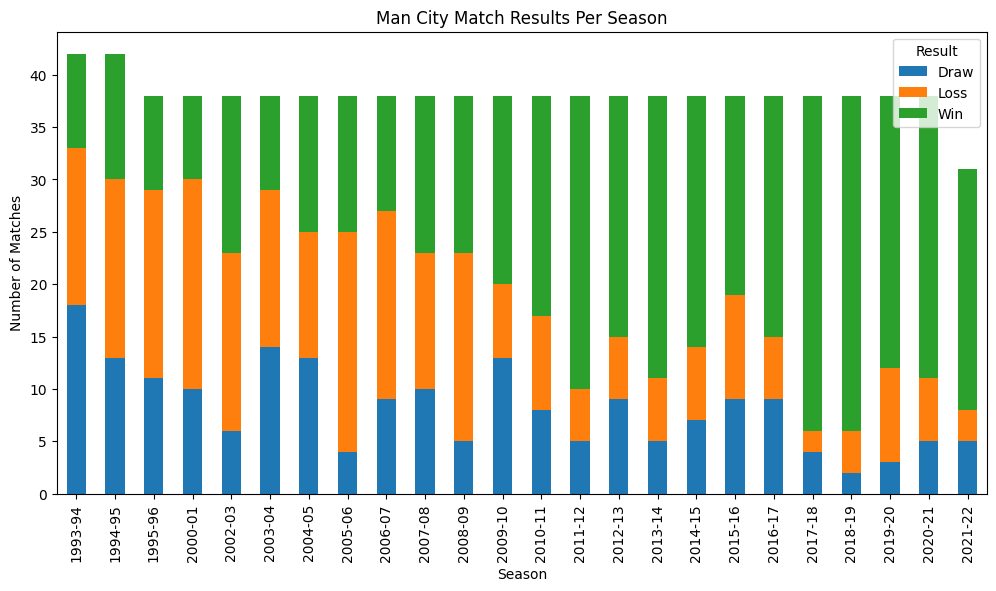

In [41]:
results_per_season = mc.groupby(['Season', 'Result']).size().unstack().fillna(0)

results_per_season.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Man City Match Results Per Season')
plt.ylabel('Number of Matches')
plt.xlabel('Season')
plt.show()
